# Overview

This project deals mainly with visualising data and relatioships between parts(columns) of the dataset. 

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

I would be using this medium to seek answers to questions like:

1. Which category of majors have the most students?

2. How many majors are predominantly male? Predominantly female?

3. What is the Median Salary range?

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]
recent_grads.head()
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [46]:
#This generates a summary Statistics of the data
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [47]:
#Dropping rows with missing values 
#as this will cause errors when using Matplotlib

raw_data_count = len(recent_grads.index)
recent_grads = recent_grads.dropna(axis= 0)
cleaned_data_count = len(recent_grads.index)

print(raw_data_count, cleaned_data_count)

173 172


## Using Scatter Plots to Analyse the data

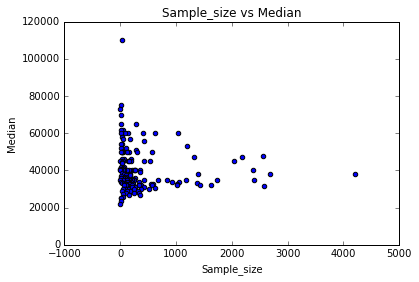

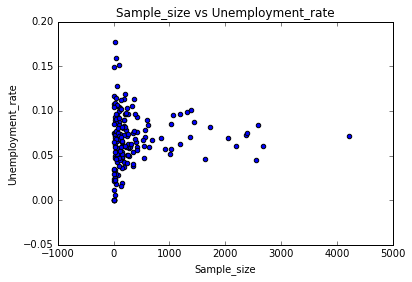

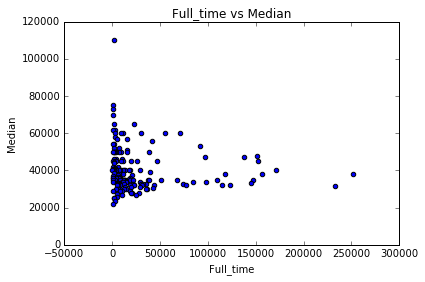

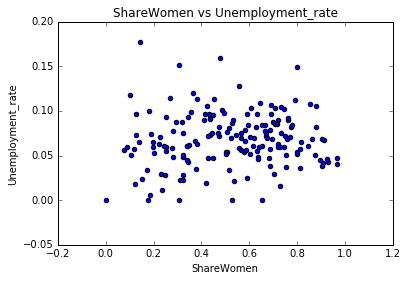

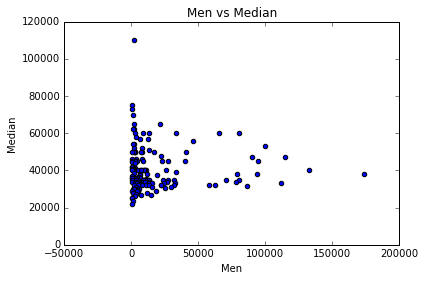

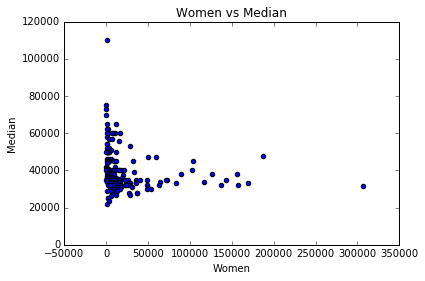

In [48]:
#Sactter plot of Sample_size vs Median
recent_grads.plot(x='Sample_size' ,y='Median', kind= 'scatter', title= 'Sample_size vs Median')

#Sactter plot of Sample_size vs Unemployment_rate
fig, ax = plt.subplots()
ax.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
ax.set_title('Sample_size vs Unemployment_rate')
ax.set_xlabel('Sample_size')
ax.set_ylabel('Unemployment_rate')

#Sactter plot of Full_time vs Median
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs Median')


#Sactter plot of ShareWomen vs Median
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title= 'ShareWomen vs Unemployment_rate')

#Sactter plot of Men vs Median
recent_grads.plot(x='Men', y='Median', kind= 'scatter', title='Men vs Median')

#Sactter plot of Women vs Median
recent_grads.plot(x='Women', y='Median', kind= 'scatter', title='Women vs Median')

## Findings So far

- From this scatter plot we notice that there is very little correlation between the percentage of women(ShareWomen) and the rate of unemployment (Unemployment_rate)

## Histogram
## Exploring the distribution of values in a column 

4212

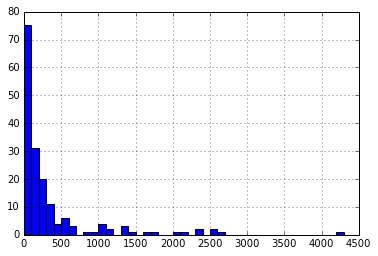

In [49]:
#Histogram of Sample_size
recent_grads['Sample_size'].hist(bins=45, range=(0,4500))
recent_grads['Sample_size'].max()

22000

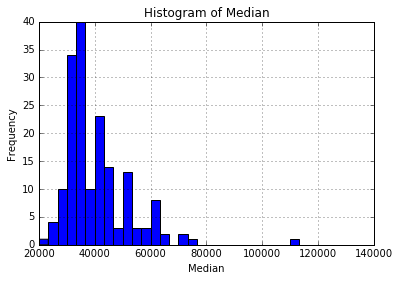

In [50]:
#Histogram of Median
ax = recent_grads['Median'].hist(bins= 30, range=(20000,120000))
ax.set_title('Histogram of Median')
ax.set_xlabel('Median')
ax.set_ylabel('Frequency')
recent_grads['Median'].min()

307933

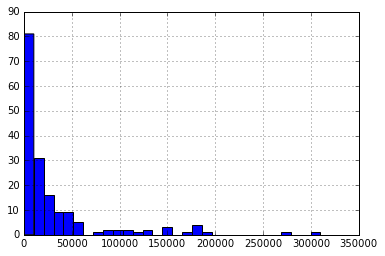

In [51]:
#Histogram of Employed
recent_grads['Employed'].hist(bins= 30, range=(0,310000))
recent_grads['Employed'].max()


111

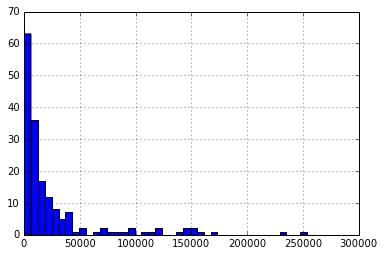

In [52]:
#Histogram of Full_time
recent_grads['Full_time'].hist(bins=42, range=(100,260000))
recent_grads['Full_time'].min()

0.968953683

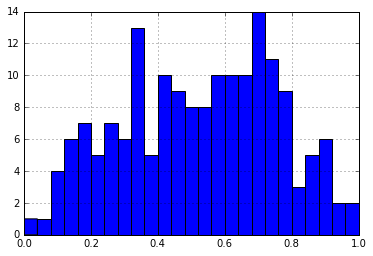

In [53]:
#Histogram of ShareWomen
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))
recent_grads['ShareWomen'].max()

0.177226407

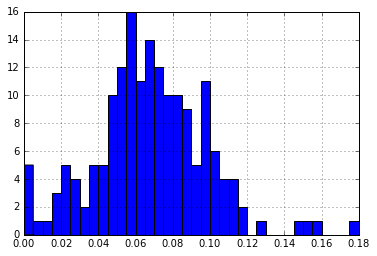

In [54]:
#Histogram of Unemployment_rate
recent_grads['Unemployment_rate'].hist(bins=36, range=(0,0.18))
recent_grads['Unemployment_rate'].max()

173809.0

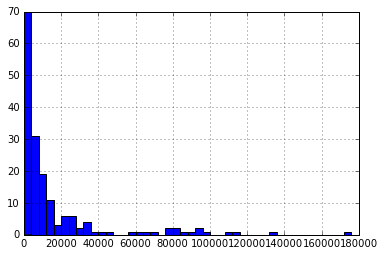

In [55]:
#Histogram of Men
recent_grads['Men'].hist(bins=45, range=(0,180000))
recent_grads['Men'].max()

0.0

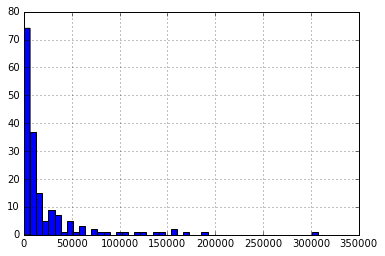

In [56]:
#Histogram of Women
recent_grads['Women'].hist(bins=50, range=(0,320000))
recent_grads['Women'].min()

## Findings So Far

- The most common median salary range is 33,333 - 36,666

- Around 52.33% of courses have female majority(that is about 90 of the 172 courses are female dominated)

- Around 47.67% of courses are male dominated, i.e. about 82 majors out of a total of 172 have a male majority 

## Scatter Matrix
## Exploring the relationship between Scatter plots and Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facfb76a8d0>,
      dtype=object)

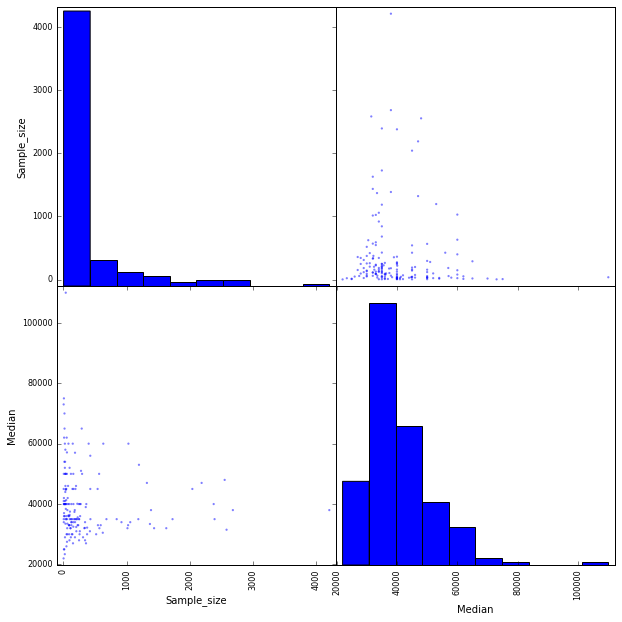

In [57]:
from pandas.plotting import scatter_matrix

#A 2x2 scatter_matrix of Sample_size by Median
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facfbb1eb00>,
      dtype=object)

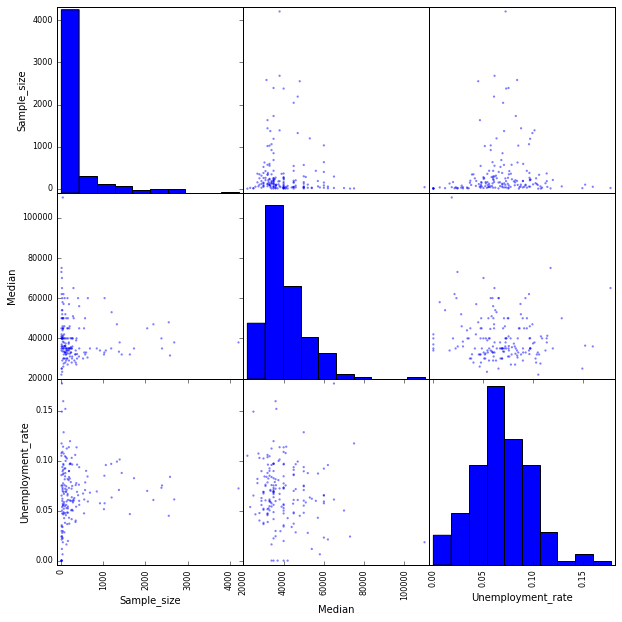

In [58]:
#A 3x3 scatter_matrix of Sample_size by Median

scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize = (10,10))

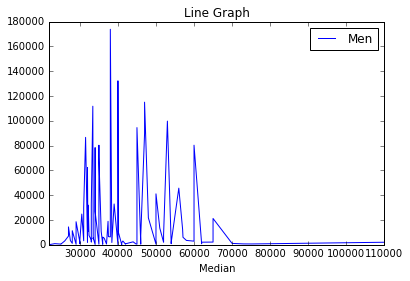

In [59]:
#Line Graph
recent_grads.plot(x= 'Median', y='Men',title='Line Graph')


## Bar Plot

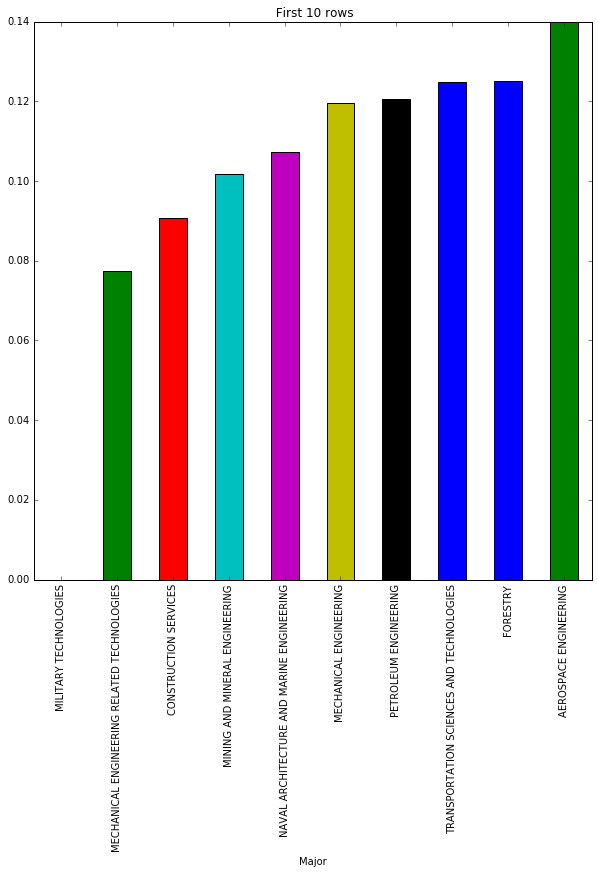

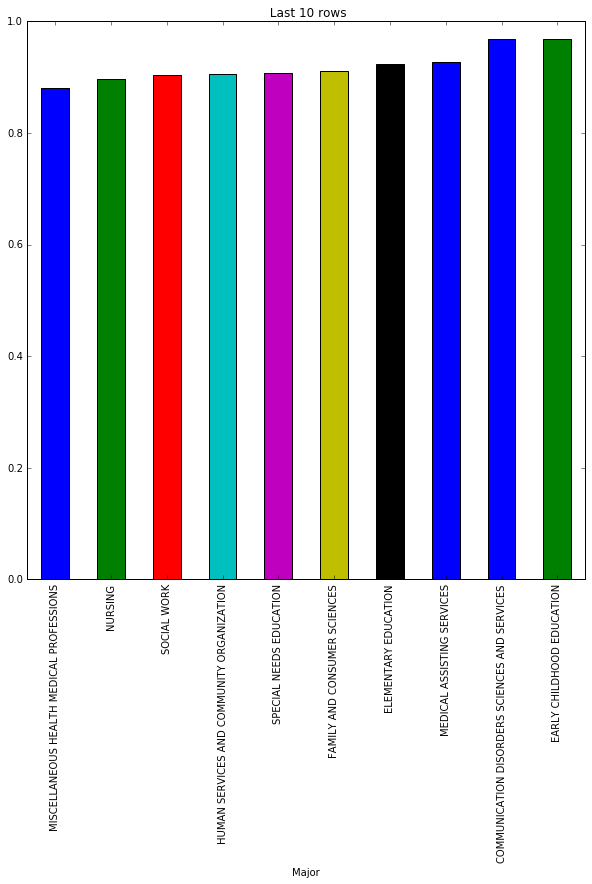

In [60]:
#Comparing the percentage of women(ShareWomen) 

#Sorting the dataframe in ascending order using ShareWomen as key
sorting_ShareWomen = recent_grads.sort_values('ShareWomen')

# first 10 rows
sorting_ShareWomen[:10].plot.bar(x='Major',y='ShareWomen', figsize=(10,10), title=' First 10 rows', legend= False)

#Last 10 rows
sorting_ShareWomen[162:].plot.bar(x='Major', y='ShareWomen',figsize=(10,10), title=' Last 10 rows', legend= False)



,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0


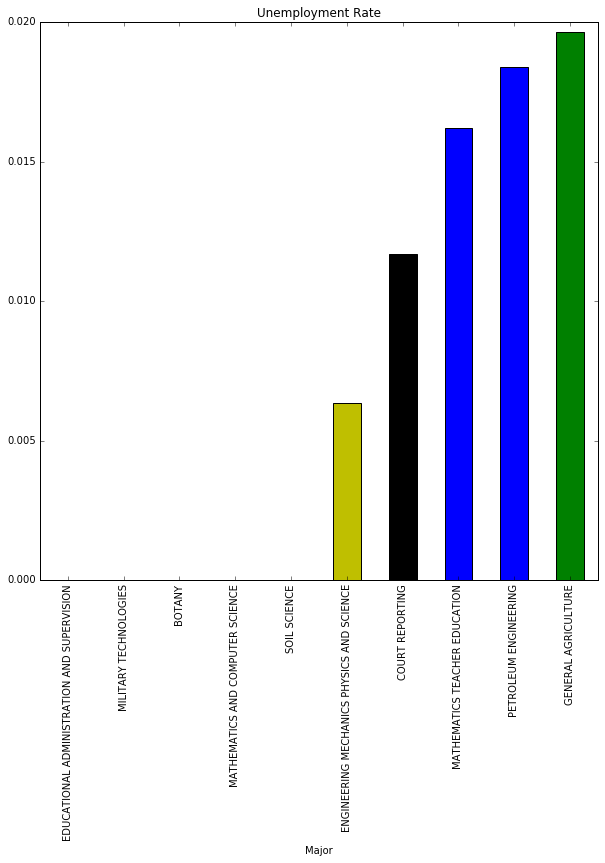

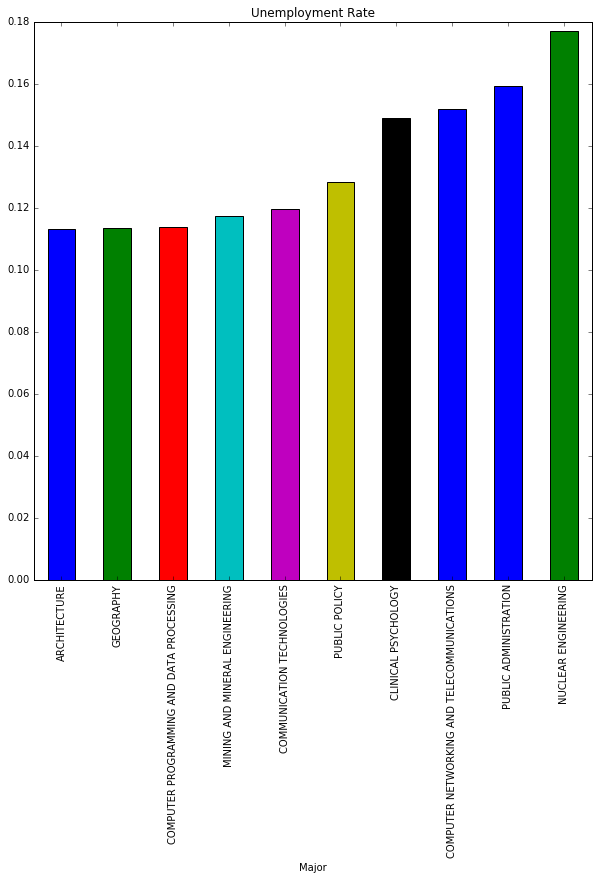

In [61]:
#Comparing the unemployment rate

#Sorting out the Unemployment rate
Unemployment_rate = recent_grads.sort_values('Unemployment_rate')

#First 10 rows
Unemployment_rate[:10].plot.bar(x='Major',y='Unemployment_rate', figsize=(10,10), title='Unemployment Rate', legend= False)

#Last 10 rows
Unemployment_rate[162:].plot.bar(x='Major',y='Unemployment_rate', figsize=(10,10), title='Unemployment Rate', legend= False)

Unemployment_rate.iloc[0:5]

## Findings So Far 

- From the bar charts plotted we notice that:

1. The percentage of women is highest in 'Early Childhood Education'  major (96.895%). That is this course is filled with women mostly.

2. The percentage of women is lowest in 'Military Technologies' major(0). From the bar chart it can be noted that no woman offers this major.

3. The highest unemployment rate can be found among graduates with a 'Nulclear Engineering' major(17.7%).This is a very high rate

4. It can be noted that 5 majors have a 0% unemployment rate for their recent graduatesi.e. EVERYONE is employed either part time or full time. They include:
    1. EDUCATIONAL ADMINISTRATION AND SUPERVISION
    2. MILITARY TECHNOLOGIES
    3. MATHEMATICS AND COMPUTER SCIENCE
    4. SOIL SCIENCE
    5. BOTANY